In [21]:
import tensorflow as tf 
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1109.8618, shape=(), dtype=float32)


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

Num samples class_0 2216
Num samples class_1 2250


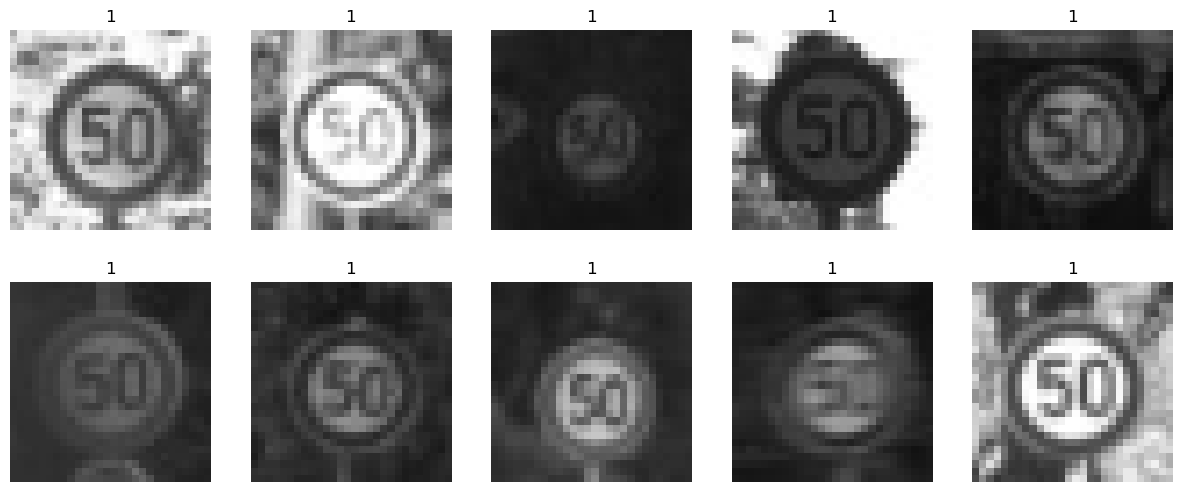

In [4]:
folder = 'D:/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

In [22]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4466, 28, 28)
Labels (4466,)


In [23]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4466, 784)
Elapsed time 0.03597760200500488


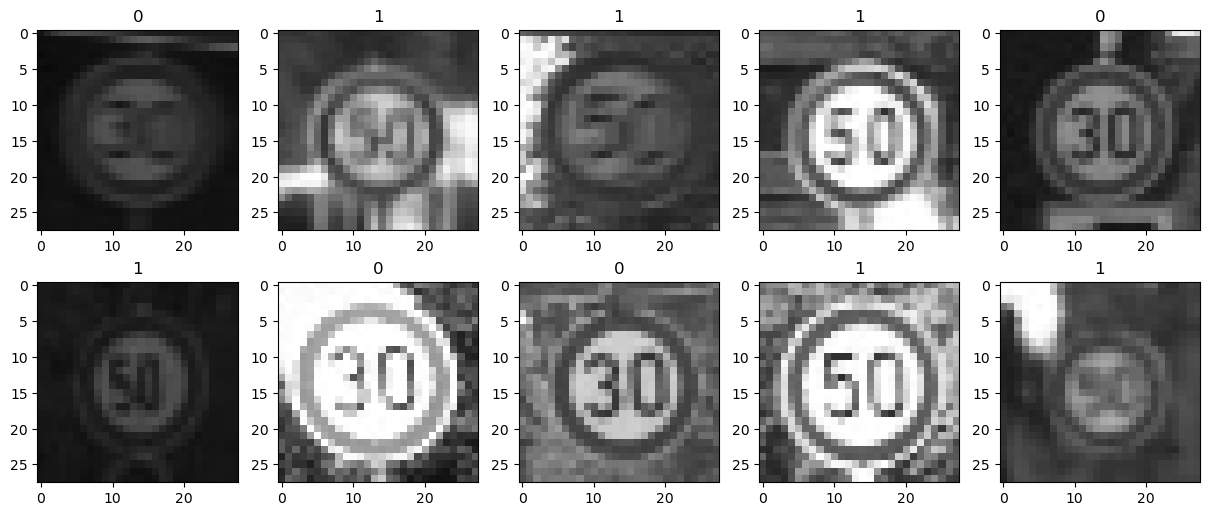

In [24]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])
    

### Building the Neural Network

In [96]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [98]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1000, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()



Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 1000)              785000    
                                                                 
Total params: 785,000
Trainable params: 785,000
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer ='adam', loss ='mean_squared_error')

In [101]:
#tf.convert_to_tensor(X_train, dtype=tf.float32)

In [102]:
#import tensorflow as tf
#from tensorflow.python.client import device_lib

#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#device_lib.list_local_devices()

In [118]:
import tensorflow as tf
history = model.fit(pixels, labels, epochs=100, batch_size=16)

Epoch 1/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0713
Epoch 2/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0702
Epoch 3/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0730
Epoch 4/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0690
Epoch 5/100
280/280 [==============================] - 1s 5ms/step - loss: 0.0672
Epoch 6/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0732
Epoch 7/100
280/280 [==============================] - 1s 5ms/step - loss: 0.0707
Epoch 8/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0686
Epoch 9/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0692
Epoch 10/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0674
Epoch 11/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0703
Epoch 12/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0681
Epoch 13/100


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

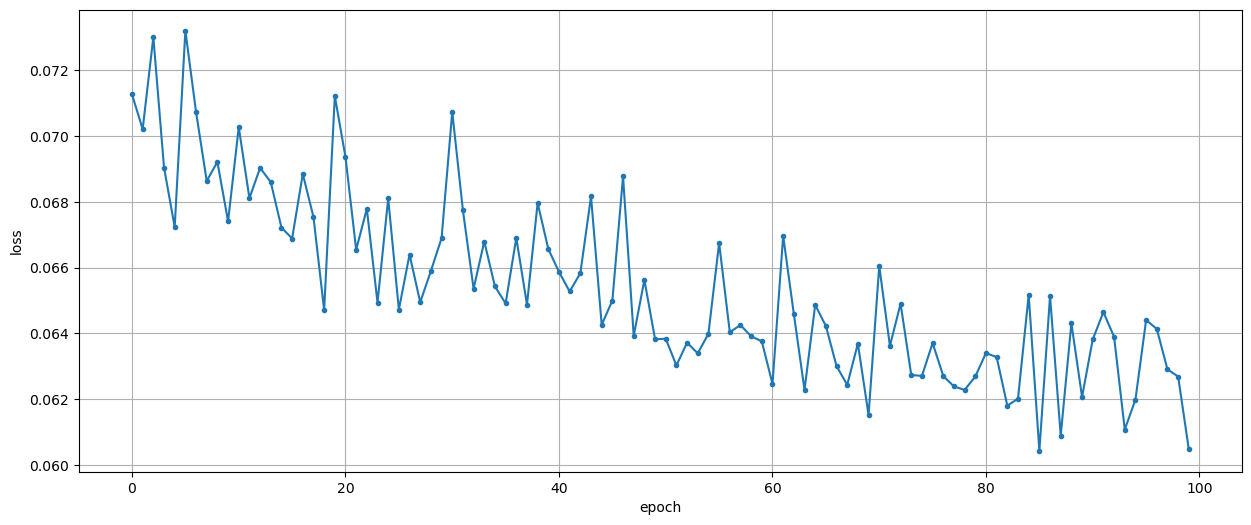

In [119]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.5256917  0.5261451  0.5252467  0.525327   0.5246074  0.5246955
 0.52484757 0.5262668  0.52459013 0.524887   0.5261105  0.5245632
 0.5248736  0.52533454 0.5253885  0.5254438  0.52571476 0.5247899
 0.52527803 0.52516043 0.52618194 0.5257598  0.5248188  0.5251853
 0.5252742  0.5250042  0.5255928  0.52579486 0.5255442  0.5253475
 0.52478135 0.5255702  0.5249976  0.5260927  0.52587706 0.52448833
 0.5246903  0.5261425  0.52519464 0.5248039  0.5249509  0.5251856
 0.5252335  0.5254619  0.52494633 0.5248456  0.5262762  0.52557516
 0.5256424  0.52534467 0.5257496  0.525929   0.5255129  0.5253979
 0.52573055 0.52545035 0.5256967  0.52479786 0.5249331  0.52595925
 0.52582544 0.52508324 0.5257937  0.5255484  0.52637446 0.5257522
 0.5251548  0.525435   0.52545154 0.52589947 0.5259954  0.5245456
 0.525157   0.52586585 0.5253532  0.5258846  0.5245056  0.5259971
 0.525292   0.5249928  0.52536064 0.52508014 0.5259158  0.52524525
 0.525383   0.52542275 0.52546954 0.52577686 0.52439916 0.52533835
 0.52

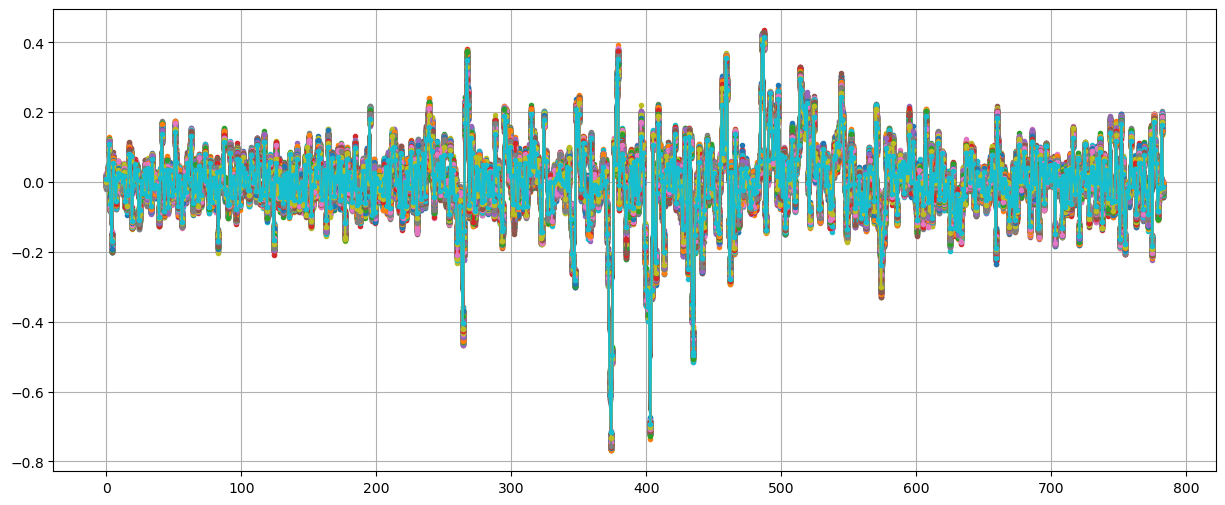

In [120]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

### Performance Evaluation

In [121]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 25ms/step
[[-0.22644699 -0.26945007 -0.2591371  -0.2747879  -0.27423614 -0.28970218
  -0.26010424 -0.26108313 -0.2547782  -0.26316327 -0.2770638  -0.26307636
  -0.26943374 -0.25080705 -0.26250052 -0.2608809  -0.25287586 -0.27033812
  -0.25987864 -0.26662868 -0.2703737  -0.25567943 -0.2538557  -0.27667433
  -0.25314718 -0.25765526 -0.25682223 -0.24339247 -0.26557606 -0.26264602
  -0.25827855 -0.25682396 -0.26816958 -0.26073015 -0.2528692  -0.25123978
  -0.2568643  -0.2508387  -0.25295478 -0.25371492 -0.24792945 -0.25666678
  -0.2722466  -0.27338153 -0.2573954  -0.26038933 -0.2538724  -0.25920933
  -0.2806676  -0.2777393  -0.25330794 -0.2731322  -0.25301707 -0.26588702
  -0.27276605 -0.27283567 -0.26191157 -0.25011545 -0.26377738 -0.24078733
  -0.26630616 -0.2569192  -0.24693137 -0.27998573 -0.26980227 -0.26643634
  -0.25456578 -0.26751852 -0.25908196 -0.26916617 -0.2668742  -0.25968808
  -0.27910322 -0.24792361 -0.25084966 -0.24103147 -0.2612289

In [122]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 2ms/step


In [123]:
correct = 0
for prediction, label in zip(predictions, labels):
    if (prediction == label).all():
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9717868338557993


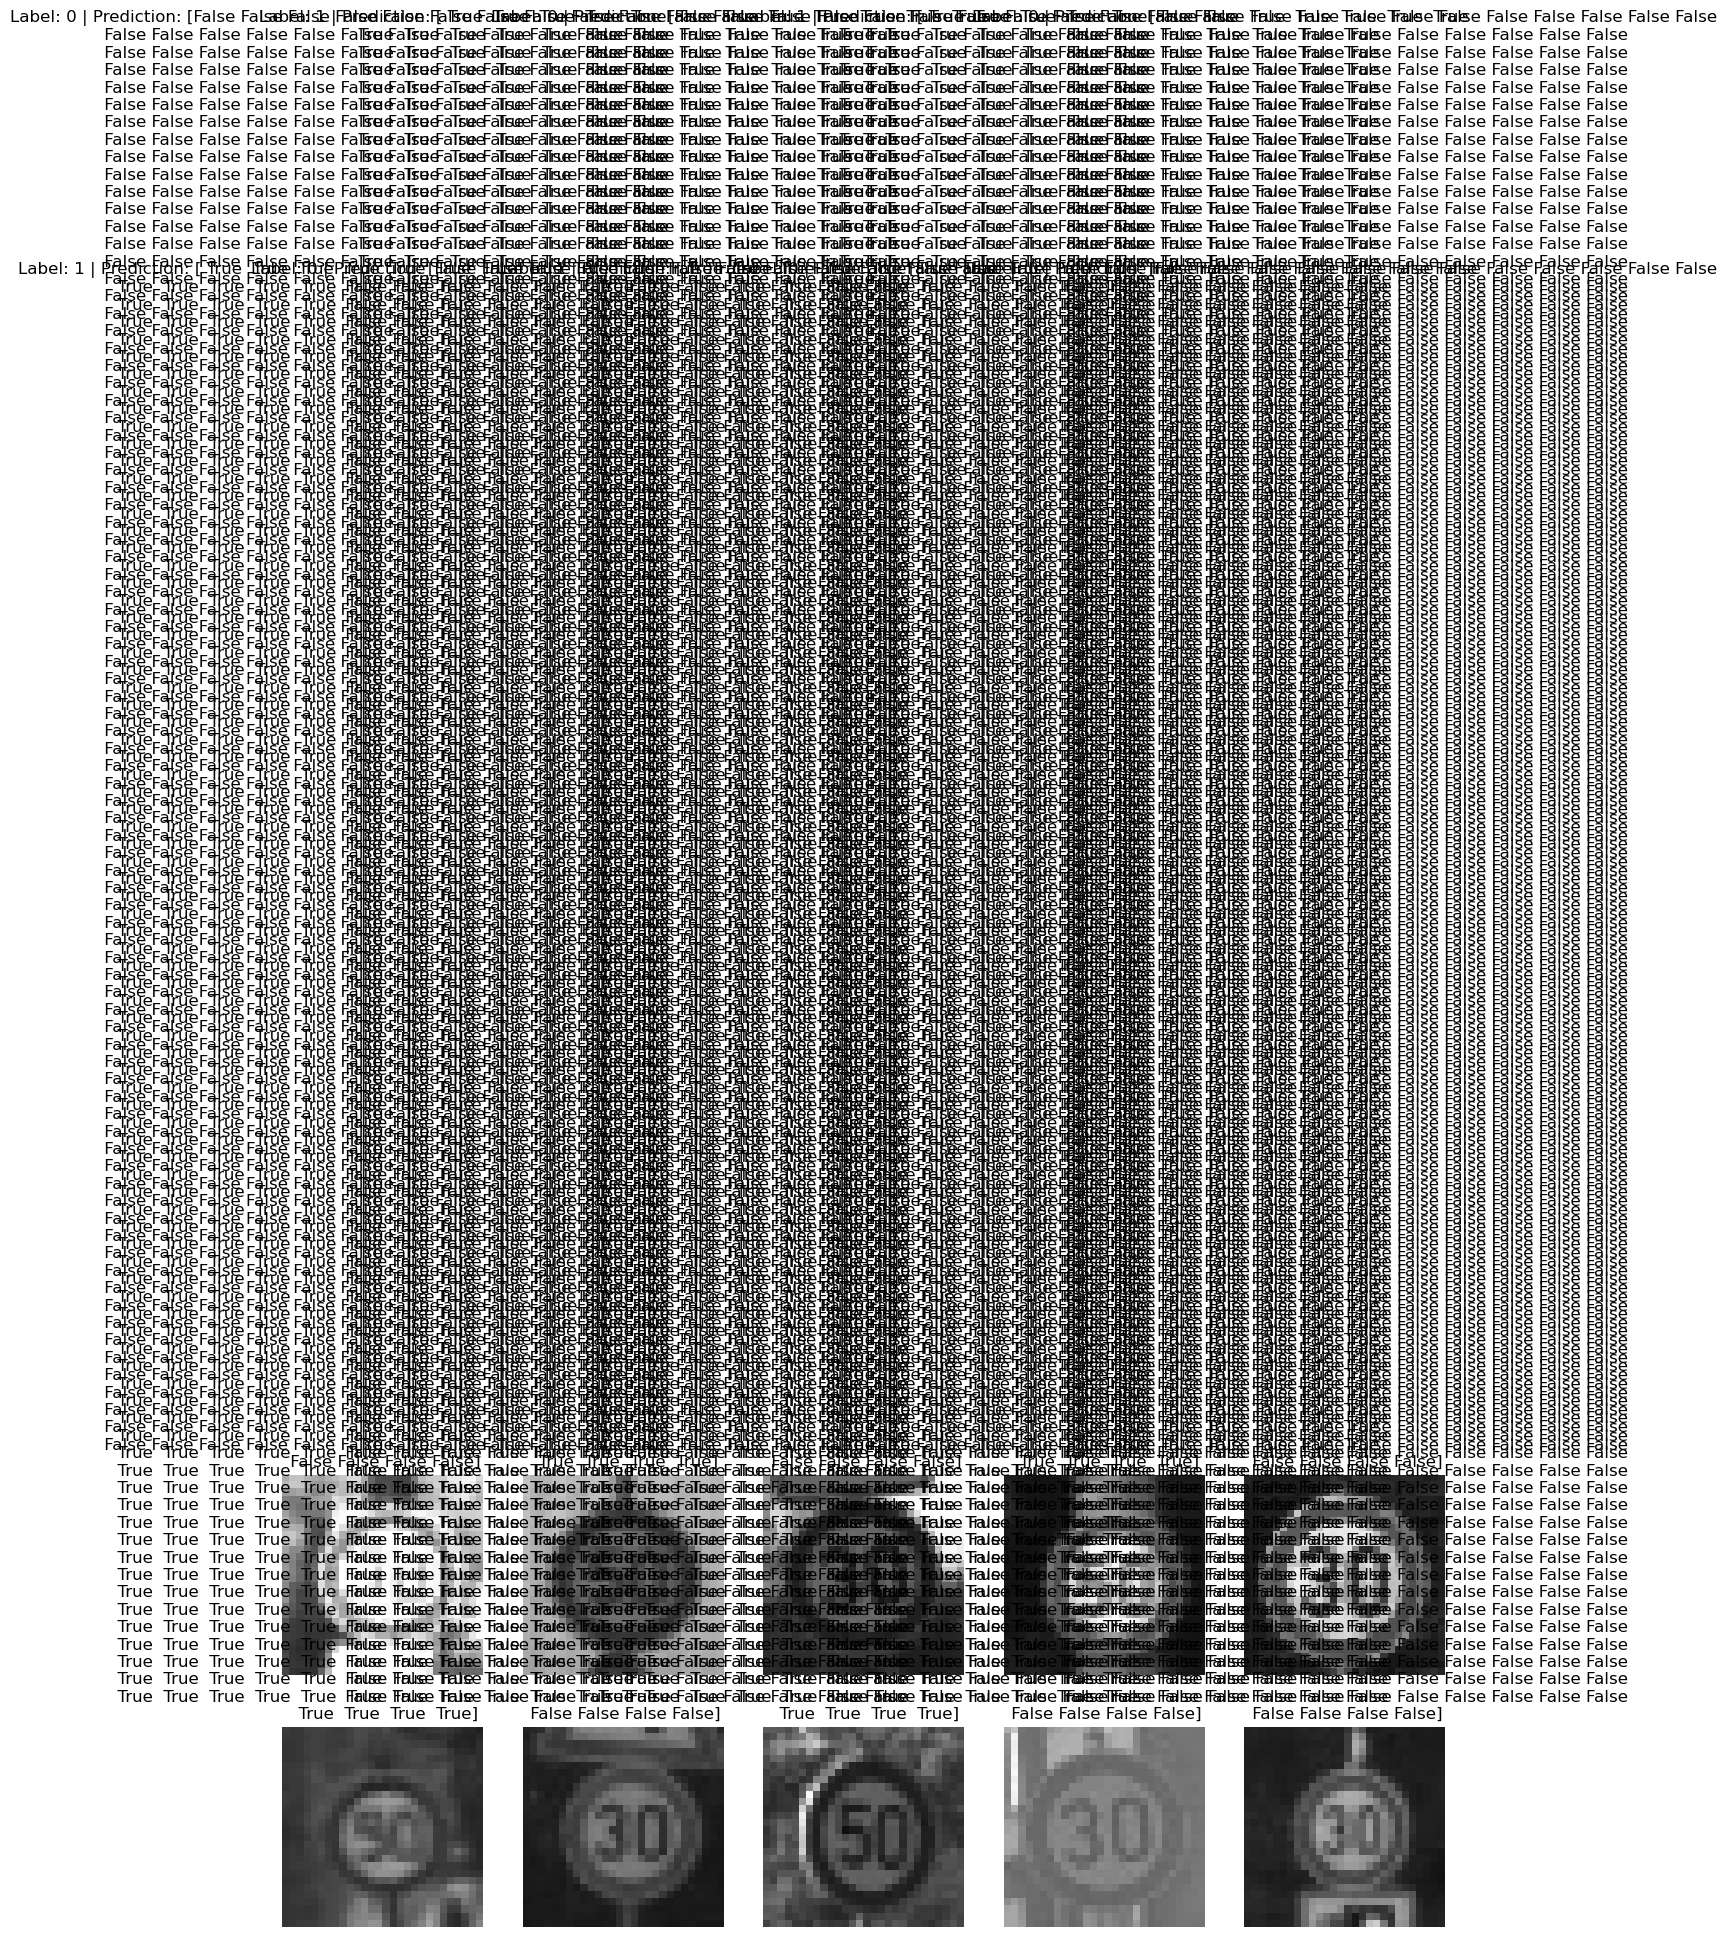

In [110]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

#### How many images are there for each class?
In class 0 there are 2216 images, also in class_1 there are 2250 images

#### What accuracy can you achieve?
With one single neuron i achieved the value of Accuracy = 0.967756381549485

#### What is the maximum accuracy you can achieve?
Maximum accuracy that i have achieved =  0.9746977160770264